# Project: Predictive Modeling for Attorney Involvement in Claims

Business Objective:
The goal of this project is to develop a model that predicts whether an attorney will be involved in a claim based on various claim-related factors. This will help insurance companies optimize their processes, reduce legal costs, and better allocate resources

Data Set Details:  The dataset contains 1,340 rows and 13 columns

# EXPLORATORY DATA ANALYSIS (EDA-PROCESS)

# STEP 1:-import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2:-Read the dataset

In [3]:
data_df =pd.read_csv('Updated_Claimants_Dataset.csv')

# STEP 3:- Data quick check

In [4]:
data_df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


In [5]:
data_df.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean
1339,34153,1,1.0,1.0,0.0,30.0,10548.36,Moderate,13522.19,1,11138.01,Third-Party,Clean


In [6]:
data_df.shape

(1340, 13)

In [7]:
data_df.size

17420

In [8]:
data_df.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Accident_Severity', 'Claim_Amount_Requested',
       'Claim_Approval_Status', 'Settlement_Amount', 'Policy_Type',
       'Driving_Record'],
      dtype='object')

In [9]:
data_df.dtypes

CASENUM                     int64
ATTORNEY                    int64
CLMSEX                    float64
CLMINSUR                  float64
SEATBELT                  float64
CLMAGE                    float64
LOSS                      float64
Accident_Severity          object
Claim_Amount_Requested    float64
Claim_Approval_Status       int64
Settlement_Amount         float64
Policy_Type                object
Driving_Record             object
dtype: object

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


# STEP 4:-NULL VALUES ANALYSIS

### check if Null values are present
* Fill the null values with Median or KNN- Imputer for Numerical column
* Fill the null values with mode for categorical columns

In [11]:
data_df.isnull().sum()

CASENUM                     0
ATTORNEY                    0
CLMSEX                     12
CLMINSUR                   41
SEATBELT                   48
CLMAGE                    189
LOSS                        0
Accident_Severity           0
Claim_Amount_Requested      0
Claim_Approval_Status       0
Settlement_Amount           0
Policy_Type                 0
Driving_Record              0
dtype: int64

# Step 5:- Handle Missing Data

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
print("\nHandling Missing Data:")
missing_cols = data_df.columns[data_df.isnull().any()]
for col in missing_cols:
    print(f"{col} - {data_df[col].isnull().sum()} missing values")
    if data_df[col].dtype == "object":
        data_df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        data_df[col].fillna(data_df[col].median(), inplace=True)

print("Missing values handled!")


Handling Missing Data:
CLMSEX - 12 missing values
CLMINSUR - 41 missing values
SEATBELT - 48 missing values
CLMAGE - 189 missing values
Missing values handled!


In [14]:
data_df.isnull().sum()

CASENUM                   0
ATTORNEY                  0
CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Accident_Severity         0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Policy_Type               0
Driving_Record            0
dtype: int64

# step-6:- DROP THE ID TYPE COLUMNS

* Which means a data has more unique labels
* Drop the single value columns


In [15]:
data_df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


### STEP-7:- CATEGORICAL COLUMN ANALYSIS

In [16]:
categorical=data_df.select_dtypes(include='object').columns
categorical

Index(['Accident_Severity', 'Policy_Type', 'Driving_Record'], dtype='object')

In [17]:
unique=data_df['Accident_Severity'].unique()
unique

array(['Severe', 'Minor', 'Moderate'], dtype=object)

In [18]:
data_df[['Accident_Severity']].value_counts()

Accident_Severity
Minor                465
Severe               440
Moderate             435
Name: count, dtype: int64

In [19]:
count=[]
for i in unique:
    con=data_df['Accident_Severity']==i
    count.append(len(data_df[con]))
count

[440, 465, 435]

In [20]:
df=pd.DataFrame(zip(unique, count), columns=['labels','counts'])
df

,labels,counts
0,Severe,440
1,Minor,465
2,Moderate,435


In [21]:
# creating a new folder
import os
new_folder='Project1'
cwd=os.getcwd()
new_dir=os.path.join(cwd, new_folder)
try:
 os.makedirs(new_dir)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\prasu\\Project1'


In [22]:
for i in categorical:
 keys=data_df[i].value_counts().keys()
 values=data_df[i].value_counts().values
 cols=['labels', 'count']
 df1= pd.DataFrame(zip(keys, values),columns=cols)
 df1
 file_name=f'{i}_table.csv'
 new_path1=os.path.join(new_dir, file_name)
 df1.to_csv(new_path1)

# BARCHART

In [23]:
categorical

Index(['Accident_Severity', 'Policy_Type', 'Driving_Record'], dtype='object')

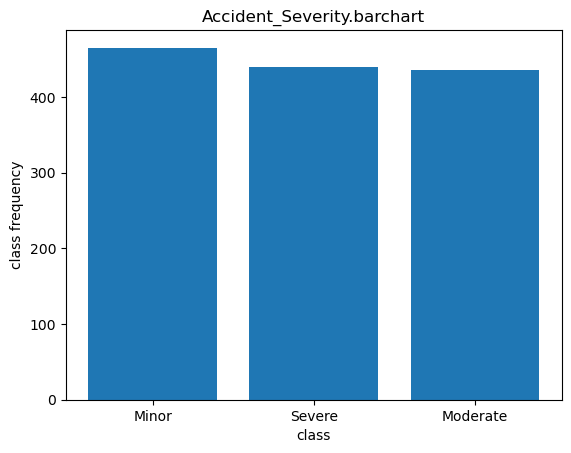

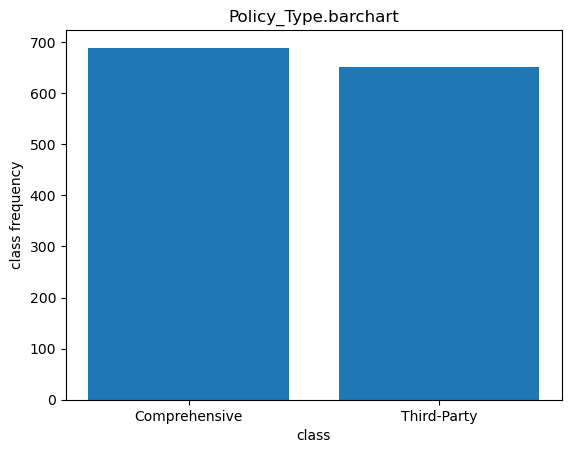

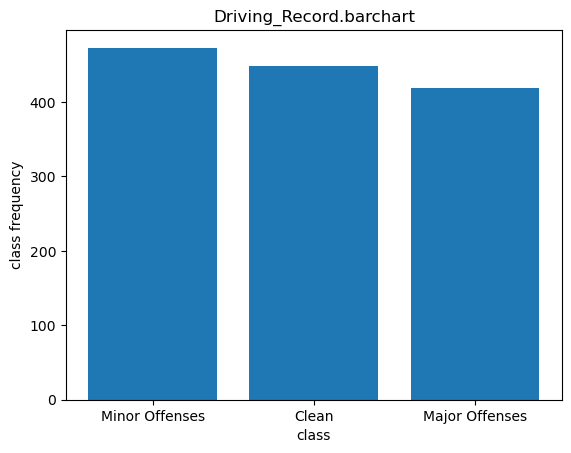

In [24]:
for i in categorical:
 keys=data_df[i].value_counts().keys()
 values=data_df[i].value_counts().values
 plt.bar(keys, values)
 plt.title(f'{i}.barchart')
 plt.xlabel('class')
 plt.ylabel('class frequency')
 plt.savefig('i.png')
 plt.show()

# PIECHART

In [25]:
categorical

Index(['Accident_Severity', 'Policy_Type', 'Driving_Record'], dtype='object')

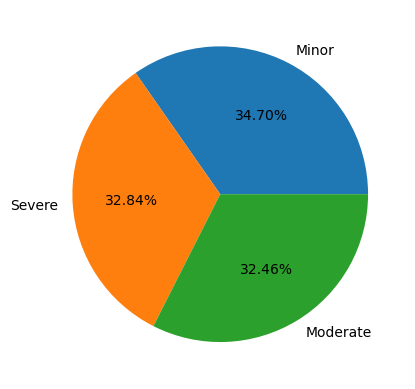

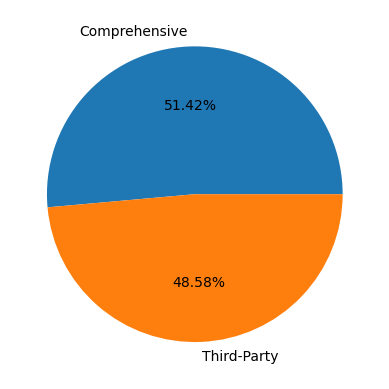

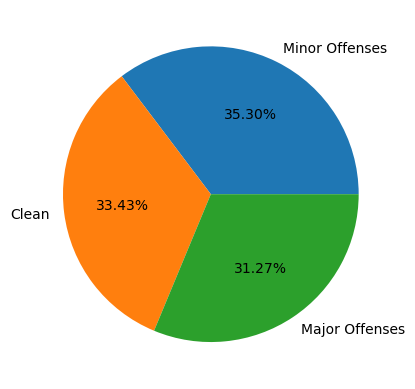

In [26]:
for i in categorical:
 keys=data_df[i].value_counts().keys()
 values=data_df[i].value_counts().values
 plt.pie(x=values, labels=keys, autopct='%0.2f%%')
 plt.savefig('i.png')
 plt.show()

# STEP-8:- NUMERICAL COLUMN ANALYSIS

In [27]:
numerical=data_df.select_dtypes(exclude='object').columns
numerical

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount'],
      dtype='object')

In [28]:
data_df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.562687,0.910448,0.016418,28.638060,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496240,0.285646,0.127124,18.825075,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,10.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,40.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


## HISTPLOT

In [29]:
numerical

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount'],
      dtype='object')

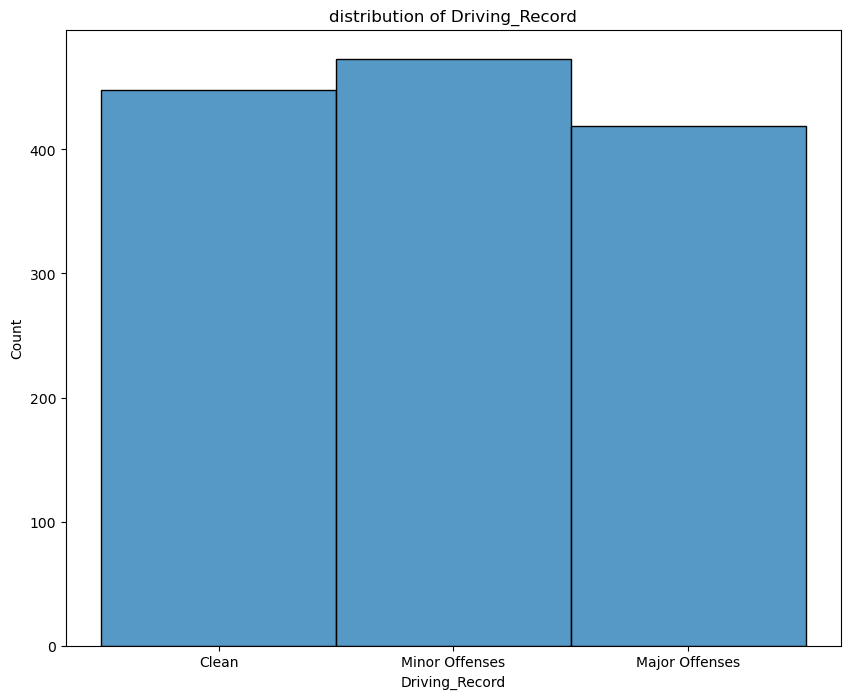

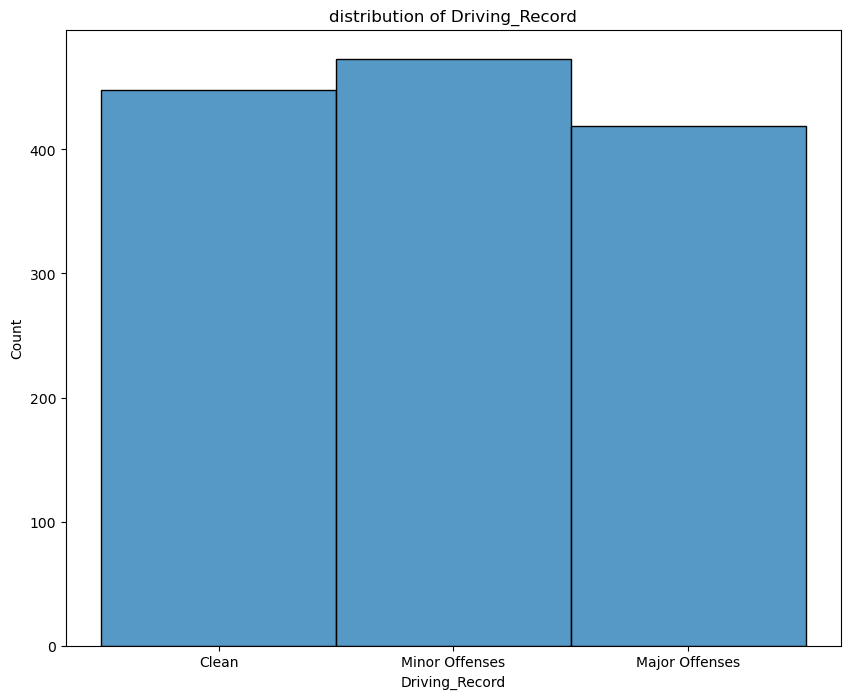

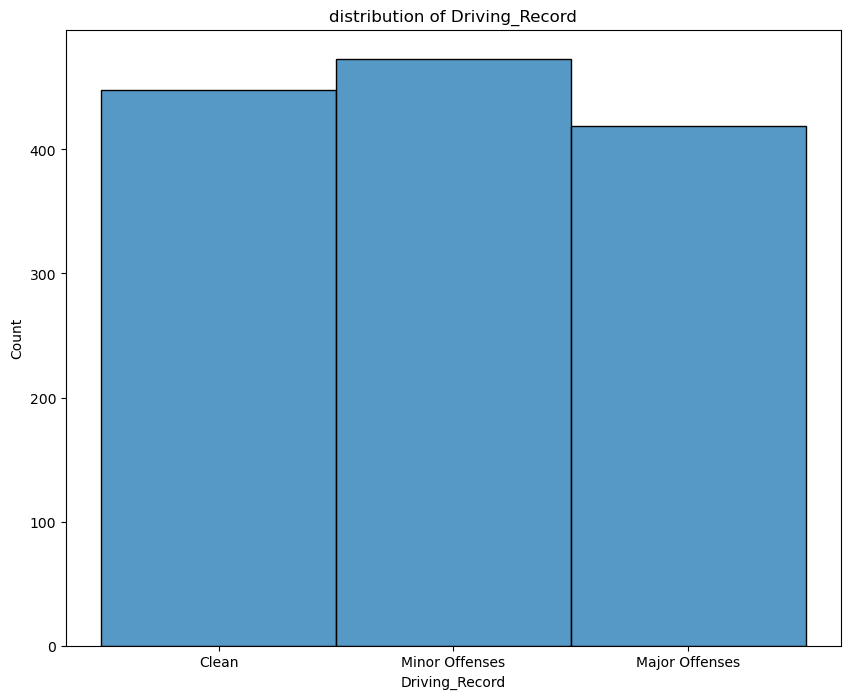

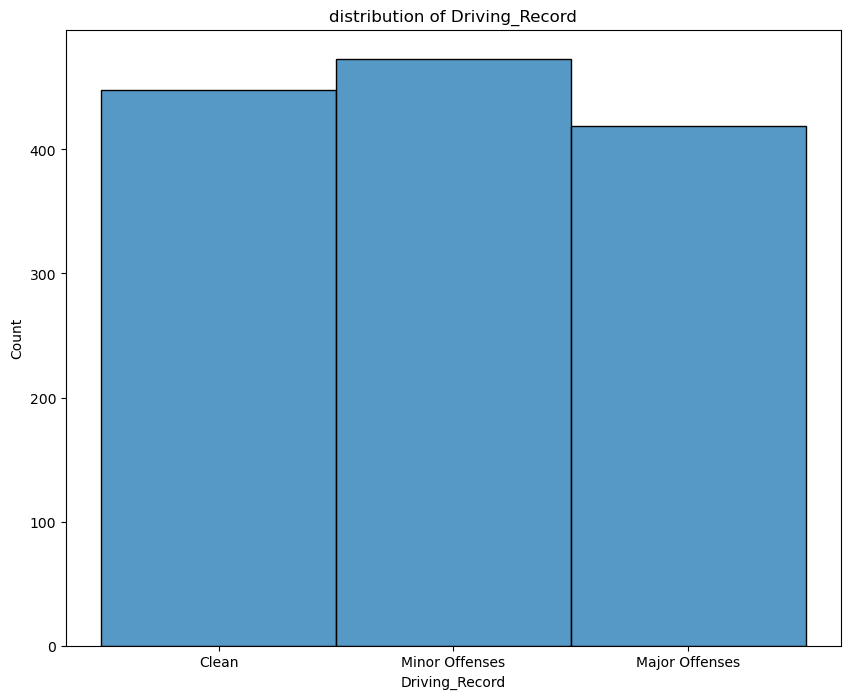

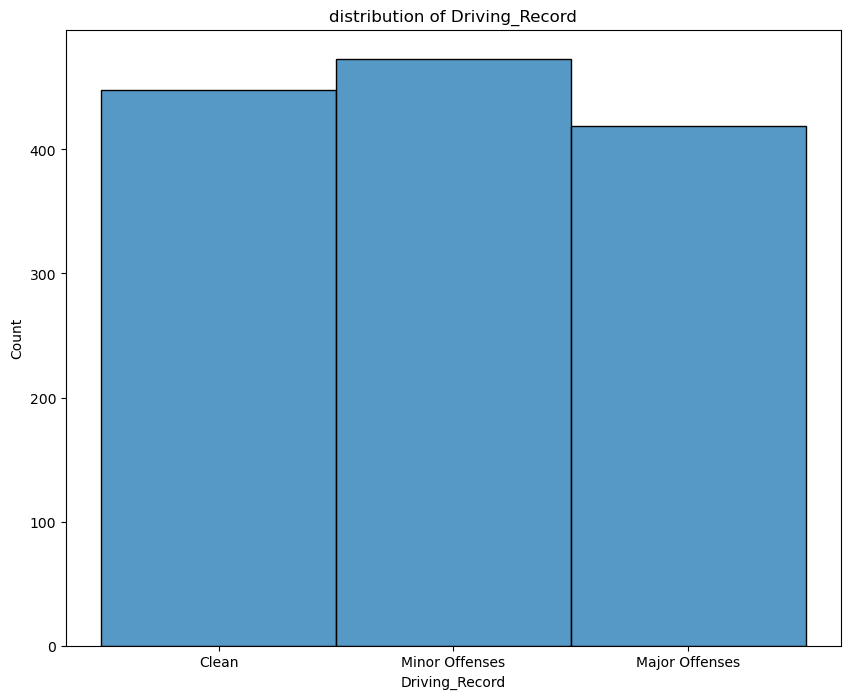

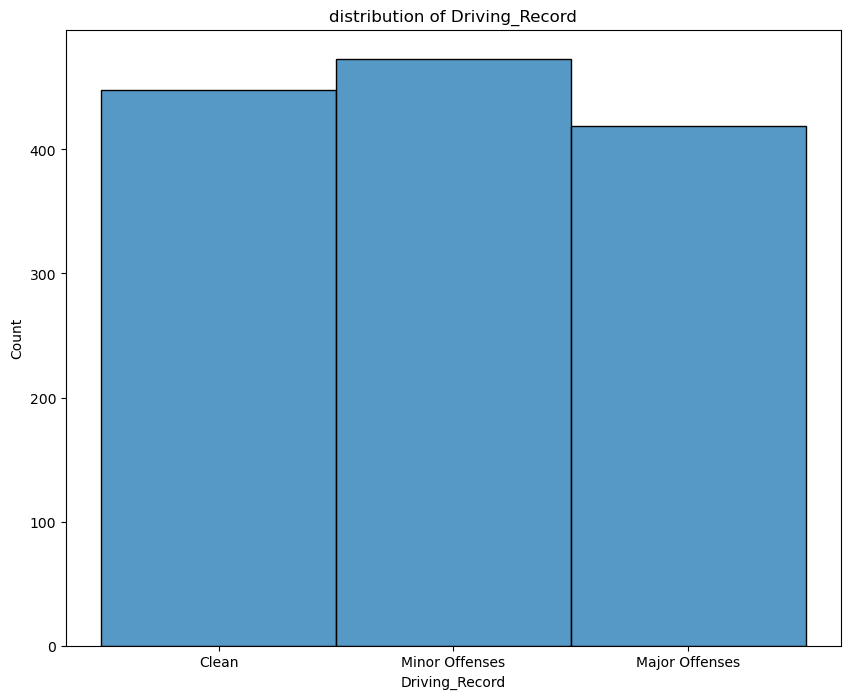

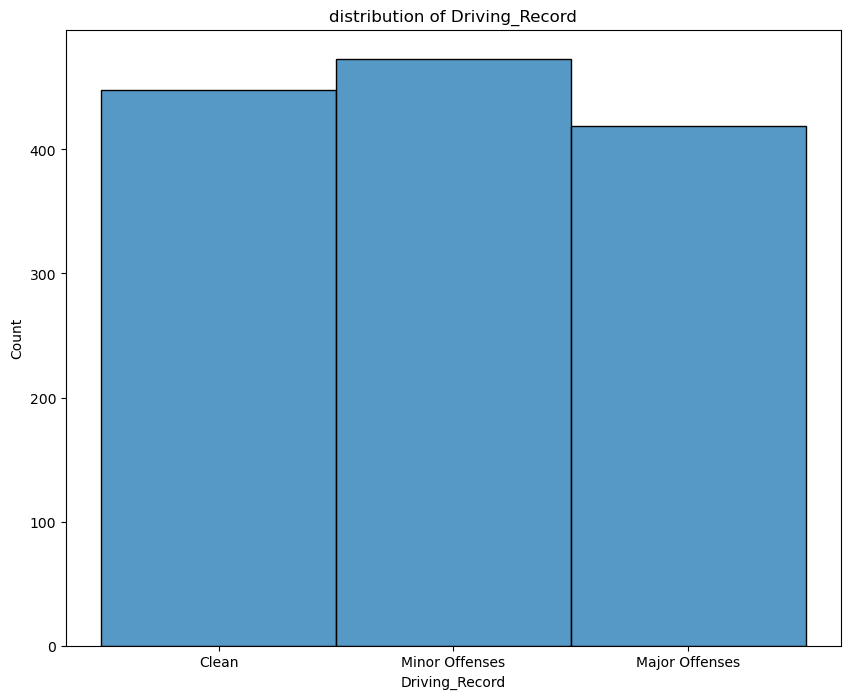

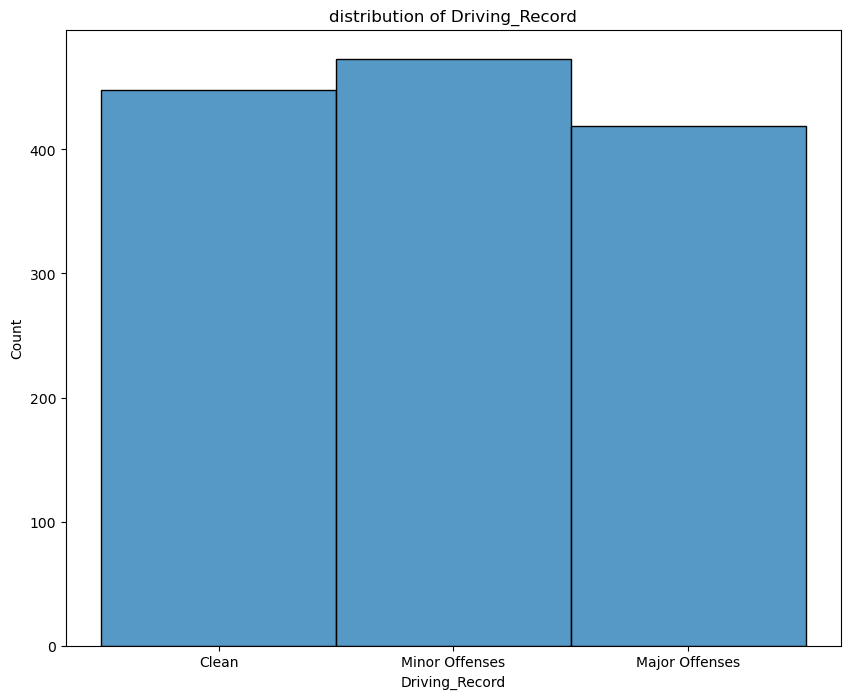

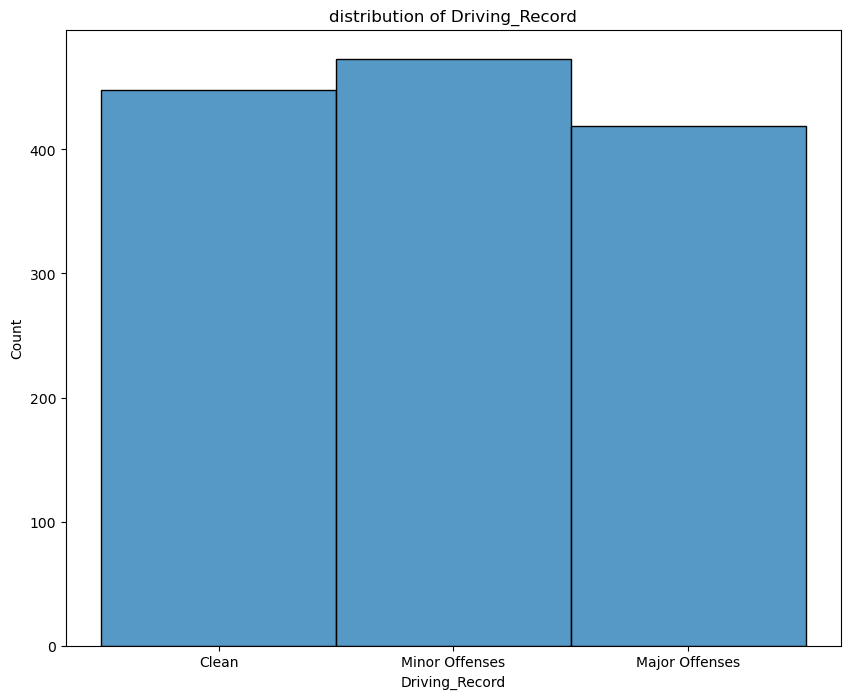

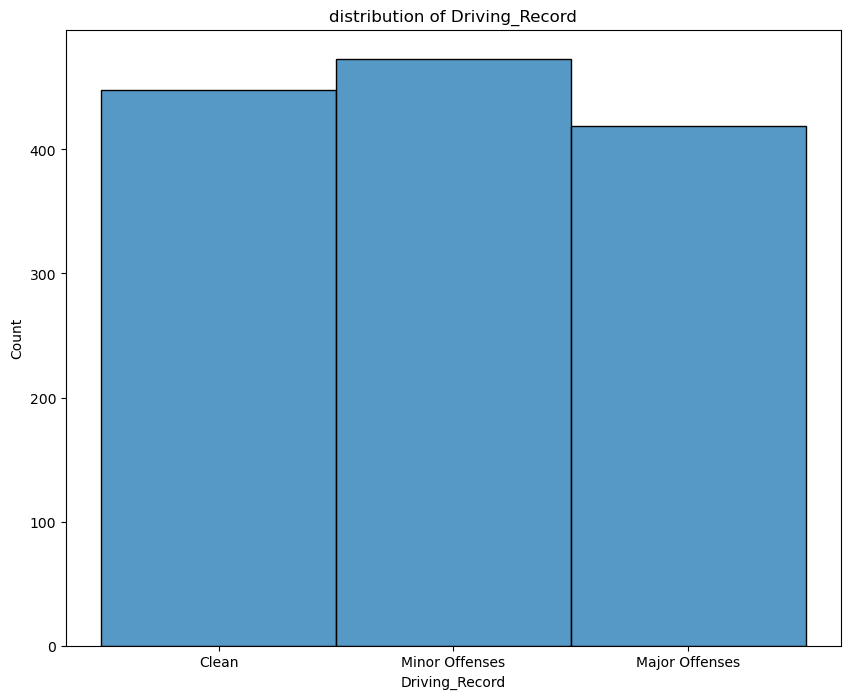

In [30]:
for col in numerical:
    plt.figure(figsize=(10,8))
    sns.histplot(data_df[i], bins=10 ,kde=False)
    plt.title(f'distribution of {i}')
    plt.savefig(f'{i}.png')
    plt.show()

# DISTPLOT

In [31]:
numerical

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount'],
      dtype='object')

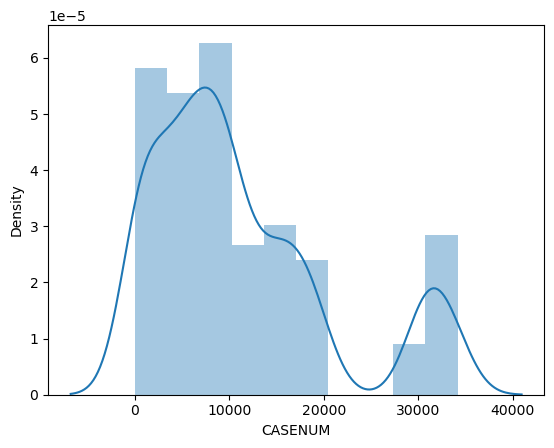

In [32]:
sns.distplot(data_df['CASENUM'], bins=10)
plt.show()

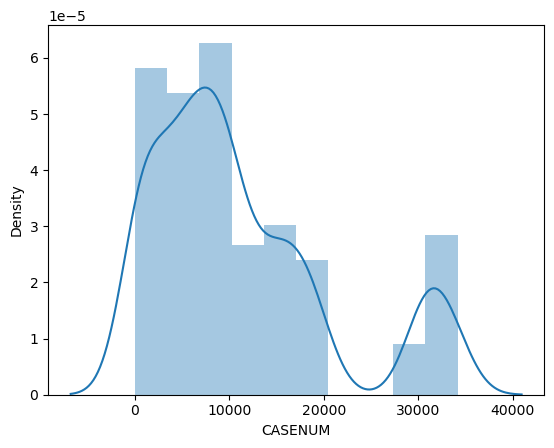

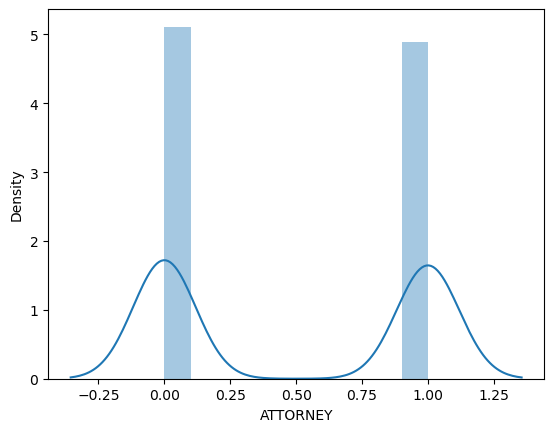

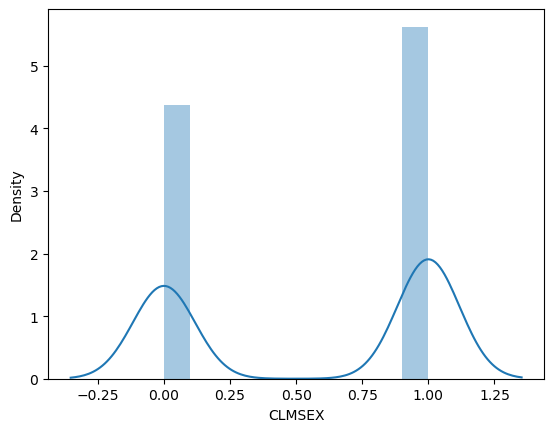

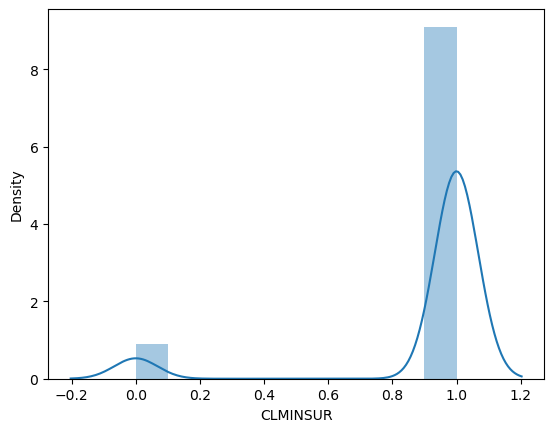

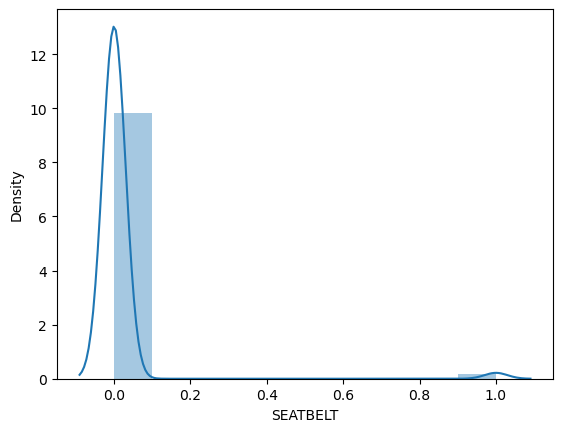

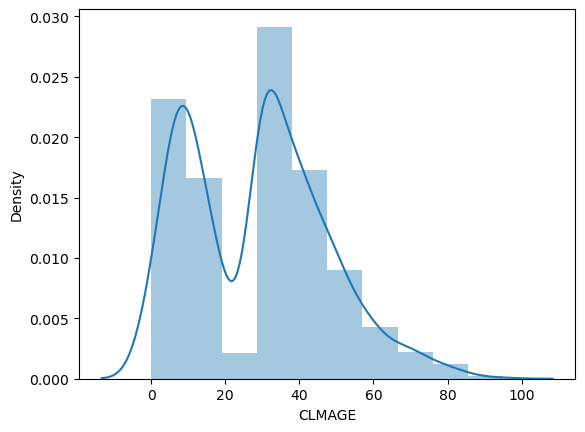

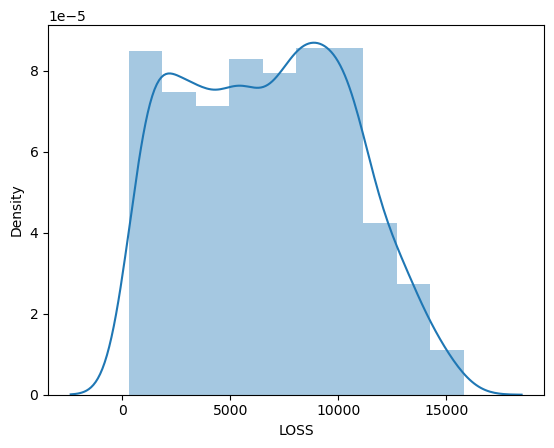

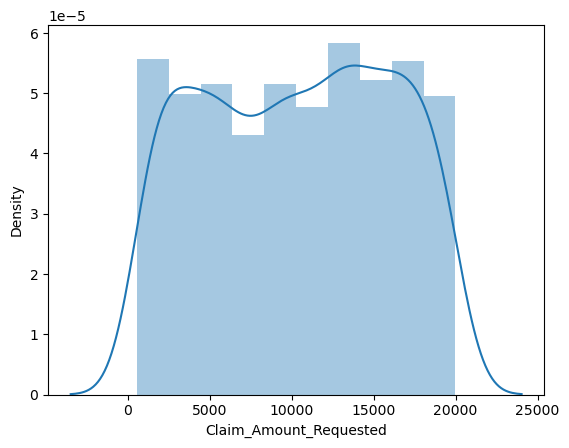

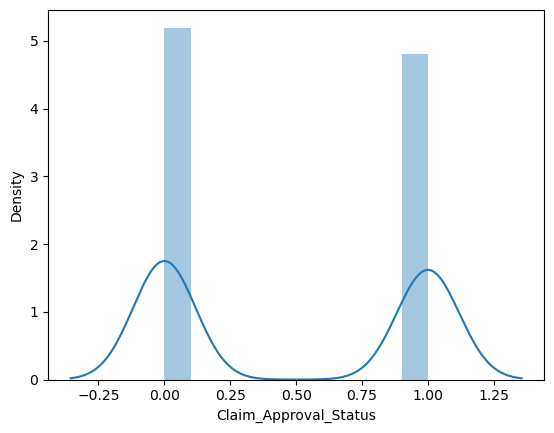

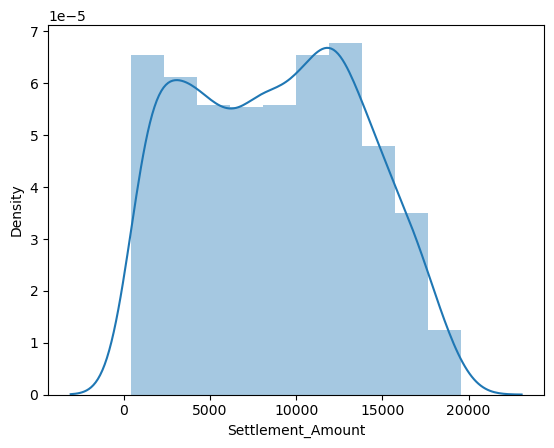

In [33]:
for i in numerical:
    sns.distplot(data_df[i], bins=10)
    plt.show()

# Step-9: Outlier Analysis

In [34]:
numerical

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount'],
      dtype='object')

In [35]:
bal_data=data_df['LOSS']
# calculate the 1st and 3rd quartile
q1=round(np.quantile(bal_data,0.25),2)
q3=round(np.quantile(bal_data, 0.75),2)
# Compute the IQR and the lower and upper bounds
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=data_df['LOSS']>lb
con2=data_df['LOSS']<ub
con3=con1&con2
count=len(data_df[con3])
non_outliers_data=data_df[con3]
non_outliers_data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


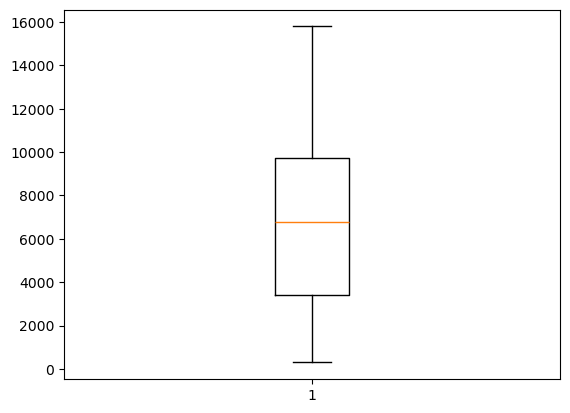

In [36]:
plt.boxplot(data_df['LOSS'])
plt.show()

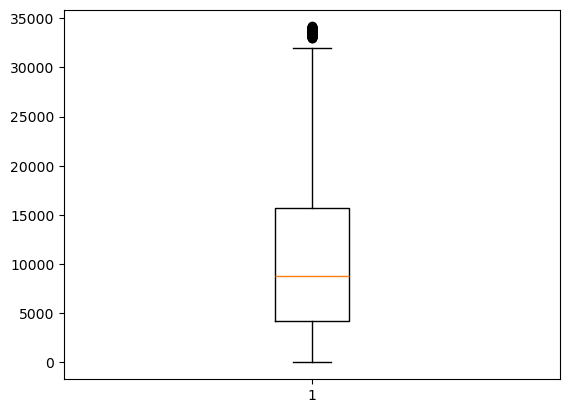

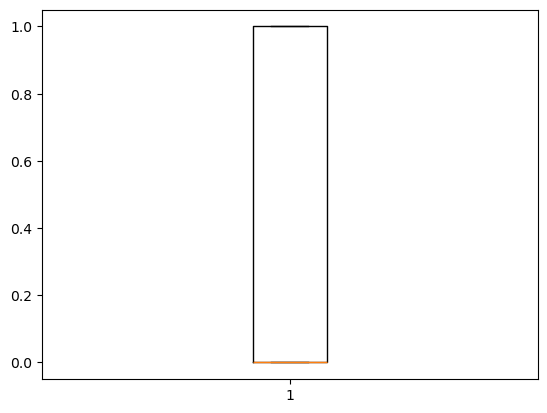

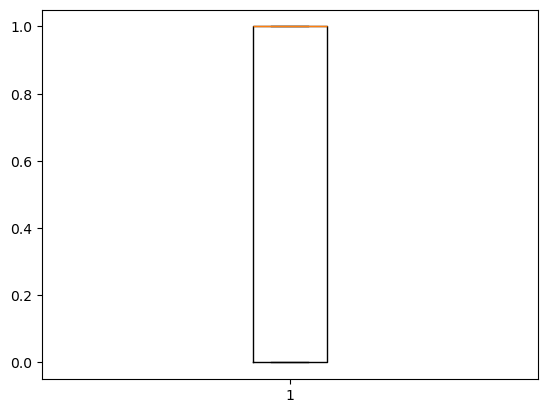

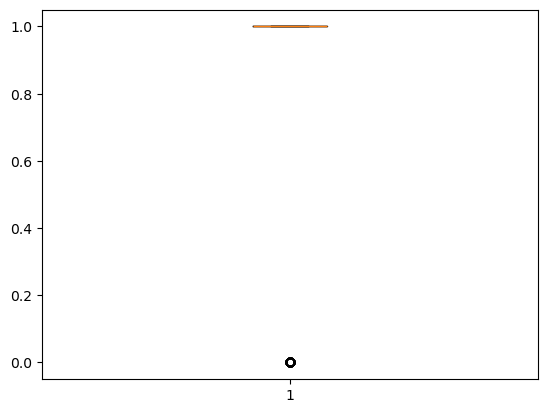

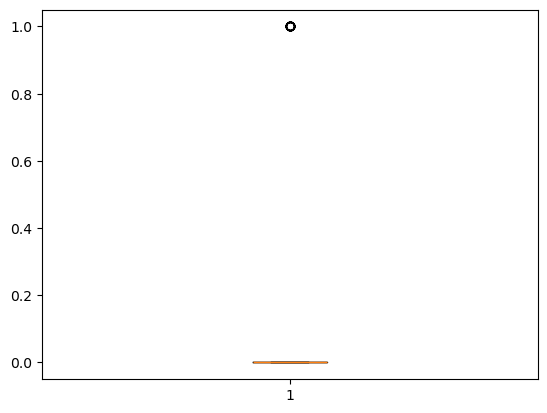

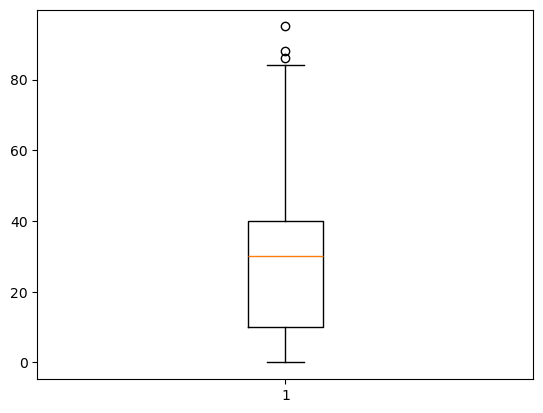

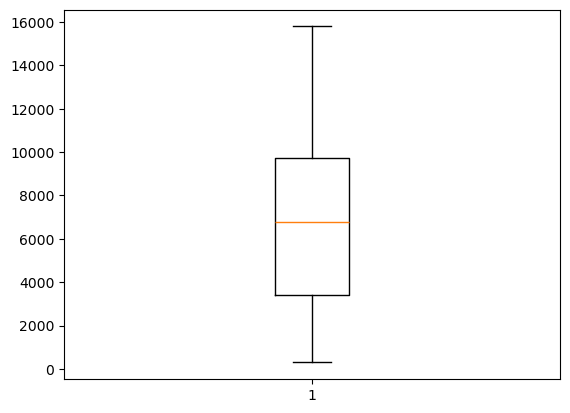

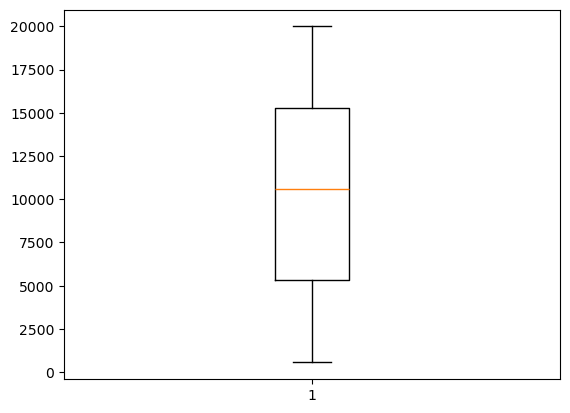

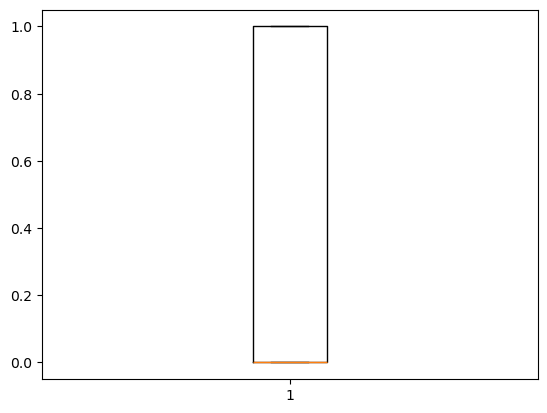

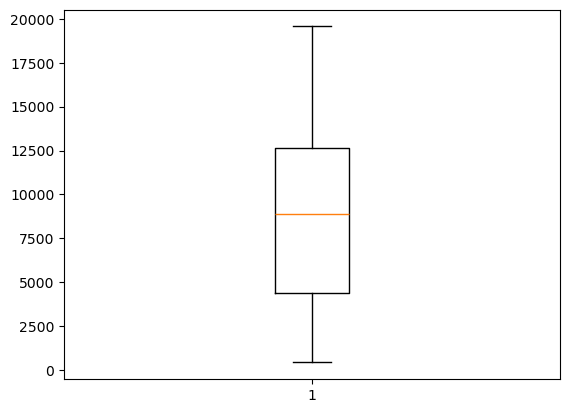

In [37]:
for i in numerical:
    plt.boxplot(data_df[i])
    plt.show()

* how to treat the outliers
*
1.fill the outliers with median
*
2.cap the outliers

In [38]:
bal_data=data_df['LOSS']
# calculate the 1st and 3rd quartile
q1=round(np.quantile(bal_data,0.25),2)
q3=round(np.quantile(bal_data,0.75),2)
# Compute the IQR and the lower and upper bounds
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
# calculate the median
median=bal_data.median()
new_data=[]
for i in bal_data:
 if i<lb or i>ub:
   new_data.append(median)
 else:
    new_data.append(i)
data_df['LOSS_1'] = new_data

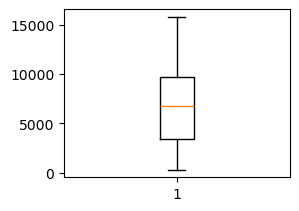

In [39]:
plt.subplot(2,2,1).boxplot(data_df['LOSS_1'])
plt.show()

In [40]:
bal_data=data_df['LOSS']
q1=round(np.quantile(bal_data,0.25),2)
q3=round(np.quantile(bal_data,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
median=bal_data.median()
# replace the outliers with median using np.where
con=(data_df['LOSS']<lb) | (data_df['LOSS']>ub)
true=median
false=data_df['LOSS']
data_df['LOSS1']=np.where(con, true,false)

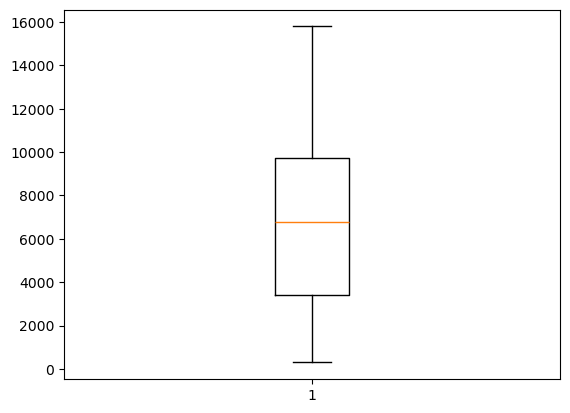

In [41]:
plt.boxplot(data_df['LOSS_1'])
plt.show()

# STEP-10:- CORRELATION

* Find the Correlation Between Numerical columns

In [42]:
numerical

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount'],
      dtype='object')

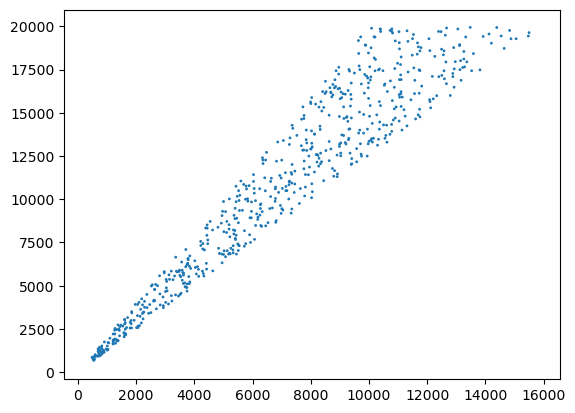

In [43]:
col1=data_df['LOSS']
col2=data_df['Claim_Amount_Requested']
col3=data_df['Claim_Approval_Status']
col4=data_df['Settlement_Amount']
plt.scatter(col1,col2,col3)

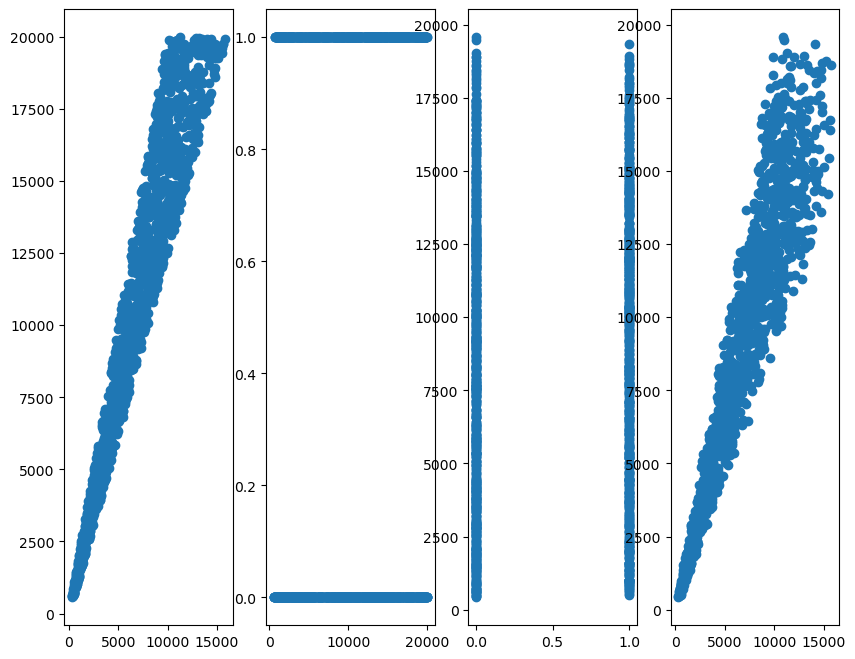

In [44]:
plt.figure(figsize=(10,8))
plt.subplot(1,4,1).scatter(col1,col2)
plt.subplot(1,4,2).scatter(col2,col3)
plt.subplot(1,4,3).scatter(col3,col4)
plt.subplot(1,4,4).scatter(col1,col4)

In [45]:
data_df.corr(numeric_only=True)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,LOSS_1,LOSS1
CASENUM,1.000000,0.011717,0.030946,0.042214,-0.009150,-0.002228,0.004575,0.012710,0.009361,0.007279,0.004575,0.004575
ATTORNEY,0.011717,1.000000,0.076564,0.076631,-0.055848,0.012223,0.021422,0.011072,0.000624,0.006963,0.021422,0.021422
CLMSEX,0.030946,0.076564,1.000000,0.065976,-0.016327,-0.023112,0.001327,-0.000169,-0.034236,0.007101,0.001327,0.001327
CLMINSUR,0.042214,0.076631,0.065976,1.000000,0.019953,0.045772,-0.005177,-0.002746,0.019206,0.002062,-0.005177,-0.005177
SEATBELT,-0.009150,-0.055848,-0.016327,0.019953,1.000000,-0.025914,0.000769,-0.008791,-0.018491,-0.015873,0.000769,0.000769
CLMAGE,-0.002228,0.012223,-0.023112,0.045772,-0.025914,1.000000,-0.024633,-0.019354,-0.009518,-0.014972,-0.024633,-0.024633
LOSS,0.004575,0.021422,0.001327,-0.005177,0.000769,-0.024633,1.000000,0.961385,0.054232,0.940719,1.000000,1.000000
Claim_Amount_Requested,0.012710,0.011072,-0.000169,-0.002746,-0.008791,-0.019354,0.961385,1.000000,0.054362,0.978993,0.961385,0.961385
Claim_Approval_Status,0.009361,0.000624,-0.034236,0.019206,-0.018491,-0.009518,0.054232,0.054362,1.000000,0.050316,0.054232,0.054232
Settlement_Amount,0.007279,0.006963,0.007101,0.002062,-0.015873,-0.014972,0.940719,0.978993,0.050316,1.000000,0.940719,0.940719


## HEATMAP

<Axes: >

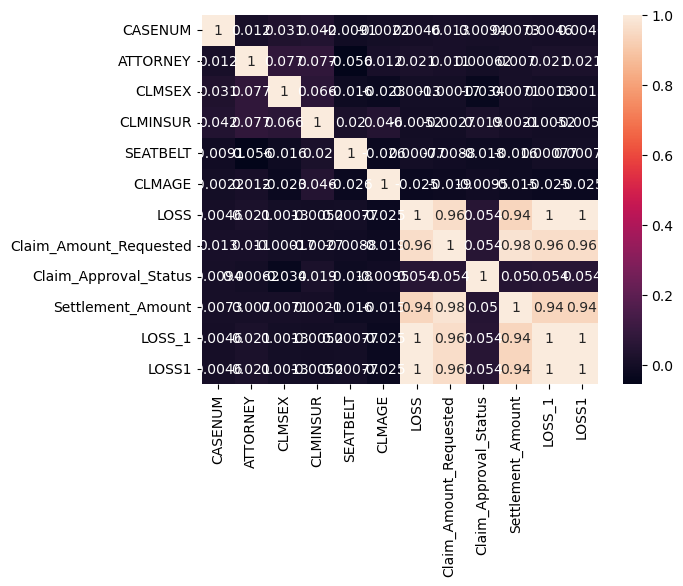

In [46]:
corr=data_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

# Step-11:- CONVERT CATEGORICAL TO NUMERICAL

## LabelEncoder

In [47]:
categorical

Index(['Accident_Severity', 'Policy_Type', 'Driving_Record'], dtype='object')

In [48]:
# import the pakage

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
data_df['Accident_Severity']=le.fit_transform(data_df['Accident_Severity'])

In [52]:
data_df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record,LOSS_1,LOSS1
0,5,0,0.0,1.0,0.0,50.0,2367.86,2,4497.19,1,3221.74,Third-Party,Clean,2367.86,2367.86
1,3,1,1.0,0.0,0.0,18.0,3746.41,0,6216.38,1,6166.17,Comprehensive,Clean,3746.41,3746.41
2,66,1,0.0,1.0,0.0,5.0,14282.43,2,17978.55,0,13804.61,Comprehensive,Minor Offenses,14282.43,14282.43
3,70,0,0.0,1.0,1.0,31.0,519.12,2,753.54,1,596.25,Comprehensive,Clean,519.12,519.12
4,96,1,0.0,1.0,0.0,30.0,1354.31,0,2167.42,0,1714.83,Comprehensive,Clean,1354.31,1354.31


In [53]:
for i in categorical:
    data_df[i]=le.fit_transform(data_df[i])

In [54]:
data_df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record,LOSS_1,LOSS1
0,5,0,0.0,1.0,0.0,50.0,2367.86,2,4497.19,1,3221.74,1,0,2367.86,2367.86
1,3,1,1.0,0.0,0.0,18.0,3746.41,0,6216.38,1,6166.17,0,0,3746.41,3746.41
2,66,1,0.0,1.0,0.0,5.0,14282.43,2,17978.55,0,13804.61,0,2,14282.43,14282.43
3,70,0,0.0,1.0,1.0,31.0,519.12,2,753.54,1,596.25,0,0,519.12,519.12
4,96,1,0.0,1.0,0.0,30.0,1354.31,0,2167.42,0,1714.83,0,0,1354.31,1354.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,30.0,11749.94,1,14992.27,0,13533.51,0,0,11749.94,11749.94
1336,34110,0,1.0,1.0,0.0,46.0,776.62,1,1438.79,0,1178.05,1,1,776.62,776.62
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,2,18106.45,1,16782.44,1,2,13261.20,13261.20
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,0,17119.15,1,14315.98,1,0,9919.60,9919.60


## One hot-Encoder

In [55]:
data_df=pd.read_csv('Updated_Claimants_Dataset.csv')
pd.get_dummies(data_df, dtype='int')

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Accident_Severity_Minor,Accident_Severity_Moderate,Accident_Severity_Severe,Policy_Type_Comprehensive,Policy_Type_Third-Party,Driving_Record_Clean,Driving_Record_Major Offenses,Driving_Record_Minor Offenses
0,5,0,0.0,1.0,0.0,50.0,2367.86,4497.19,1,3221.74,0,0,1,0,1,1,0,0
1,3,1,1.0,0.0,0.0,18.0,3746.41,6216.38,1,6166.17,1,0,0,1,0,1,0,0
2,66,1,0.0,1.0,0.0,5.0,14282.43,17978.55,0,13804.61,0,0,1,1,0,0,0,1
3,70,0,0.0,1.0,1.0,31.0,519.12,753.54,1,596.25,0,0,1,1,0,1,0,0
4,96,1,0.0,1.0,0.0,30.0,1354.31,2167.42,0,1714.83,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,14992.27,0,13533.51,0,1,0,1,0,1,0,0
1336,34110,0,1.0,1.0,0.0,46.0,776.62,1438.79,0,1178.05,0,1,0,0,1,0,1,0
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,18106.45,1,16782.44,0,0,1,0,1,0,0,1
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,17119.15,1,14315.98,1,0,0,0,1,1,0,0


# Step 12:- Save Cleaned Data

In [56]:
data_df.to_csv("Updated_Claimants_Dataset.csv", index=False)
print("Cleaned dataset saved as 'Updated_Claimants_Dataset.csv'.")

Cleaned dataset saved as 'Updated_Claimants_Dataset.csv'.


# Step-13: Scale the Data

* Standarization

In [57]:
bal_data=data_df['LOSS']
mean=bal_data.mean()
std=bal_data.std()
data=(bal_data-mean)/std
data

0      -1.140474
1      -0.776264
2       2.007332
3      -1.628907
4      -1.408252
          ...   
1335    1.338253
1336   -1.560876
1337    1.737525
1338    0.854681
1339    1.020798
Name: LOSS, Length: 1340, dtype: float64

In [58]:
# import the pakage
from sklearn.preprocessing import StandardScaler

In [59]:
ss=StandardScaler()
ss.fit_transform(data_df[['LOSS']])

array([[-1.14089955],
       [-0.77655337],
       [ 2.00808172],
       ...,
       [ 1.73817402],
       [ 0.85500024],
       [ 1.02117942]])

# Step 13:-Summarize Findings

In [60]:
print("\nEDA Summary:")
print("1. Total rows and columns:", df.shape)
print("2. Missing values handled.")
print("3. Categorical variables encoded.")
print("4. Numerical columns analysis.")
print("5. Outlier analysis.")
print("6. Correlation.")
print("7. CONVERT CATEGORICAL TO NUMERICAL.")
print("8.Save Cleaned Data")
print("9.Scale the Data .")

print("EDA Process Complete!")


EDA Summary:
1. Total rows and columns: (3, 2)
2. Missing values handled.
3. Categorical variables encoded.
4. Numerical columns analysis.
5. Outlier analysis.
6. Correlation.
7. CONVERT CATEGORICAL TO NUMERICAL.
8.Save Cleaned Data
9.Scale the Data .
EDA Process Complete!


# **FEATURE** ENGINEERING italicized text

---



In [65]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
!pip install scikit-learn --upgrade
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [66]:
df_imputed = df.copy()

In [67]:
df.shape

(3, 2)

In [68]:
# 1. Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# 2. Identify numeric columns # This line was missing
numeric_cols = df.select_dtypes(include=['number']).columns

# 3. Impute missing values separately for numeric and non-numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# 4. For non-numeric columns, use 'most_frequent' strategy
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = non_numeric_imputer.fit_transform(df[non_numeric_cols])

# 5. Now you can use numeric_cols with df_imputed
df_imputed = df.copy()
numeric_imputer = SimpleImputer(strategy='mean')
df_imputed[numeric_cols] = numeric_imputer.fit_transform(df_imputed[numeric_cols])

HANLING MISSING DATA

In [69]:
# Before applying the imputation, check if the column 'CLMAGE' exists
if 'CLMAGE' in data_df.columns:
    # 1. using Mean/medain /mode imputation
    imputer = SimpleImputer(strategy='mean')
    data_df['CLMAGE'] = data_df['CLMAGE'].fillna(data_df['CLMAGE'].mean())
    data_df['CLMSEX'] = data_df['CLMSEX'].fillna(data_df['CLMSEX'].mode()[0])


In [70]:
print("/nAfter Imputation:")
print(df.isnull().sum())

/nAfter Imputation:
labels    0
counts    0
dtype: int64


In [71]:
#2. using Forward fill and Backward fill
df_ffill = df.copy()
df_bfill = df.copy()
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [72]:
print("/nAfter Imputation:")
print(df_ffill)

/nAfter Imputation:
     labels  counts
0    Severe   440.0
1     Minor   465.0
2  Moderate   435.0


In [73]:
print("/nAfter  Backward Fill:")
print(df_bfill)

/nAfter  Backward Fill:
     labels  counts
0    Severe   440.0
1     Minor   465.0
2  Moderate   435.0


In [74]:
#3 using Interpolation
df_interpolate = df.copy()
df_interpolate.interpolate(method='linear', inplace=True)
print("/nAfter Interpolation:")
print(df_interpolate)

/nAfter Interpolation:
     labels  counts
0    Severe   440.0
1     Minor   465.0
2  Moderate   435.0


In [75]:
#4 using K-Nearest negibhoors (KNN)
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()

# Get the numeric columns that are actually in df_knn
numeric_cols_knn = df_knn.select_dtypes(include=['number']).columns

# Use the correct numeric columns for imputation
df_knn[numeric_cols_knn] = knn_imputer.fit_transform(df_knn[numeric_cols_knn])
print("/nAfter KNN Imputation:")
print(df_knn)

/nAfter KNN Imputation:
     labels  counts
0    Severe   440.0
1     Minor   465.0
2  Moderate   435.0


2.ENCODING CATEGORICAL VALUES

In [76]:
# Reload the original dataset to ensure you have the original 'CLMSEX' and 'CLMINSUR' columns
data_df = pd.read_csv('Updated_Claimants_Dataset.csv')

# Now, apply pd.get_dummies
df_encoded = pd.get_dummies(data_df, columns=['CLMSEX', 'CLMINSUR'], dtype='int')  # Specifying dtype='int'

print("/nAfter One-Hot Encoding:")
print(df_encoded)


/nAfter One-Hot Encoding:
      CASENUM  ATTORNEY  SEATBELT  CLMAGE      LOSS Accident_Severity  \
0           5         0       0.0    50.0   2367.86            Severe   
1           3         1       0.0    18.0   3746.41             Minor   
2          66         1       0.0     5.0  14282.43            Severe   
3          70         0       1.0    31.0    519.12            Severe   
4          96         1       0.0    30.0   1354.31             Minor   
...       ...       ...       ...     ...       ...               ...   
1335    34100         1       0.0     NaN  11749.94          Moderate   
1336    34110         0       0.0    46.0    776.62          Moderate   
1337    34113         1       0.0    39.0  13261.20            Severe   
1338    34145         0       0.0     8.0   9919.60             Minor   
1339    34153         1       0.0    30.0  10548.36          Moderate   

      Claim_Amount_Requested  Claim_Approval_Status  Settlement_Amount  \
0                    44

In [77]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded_data = one_hot_encoder.fit_transform(data_df[['CLMSEX', 'CLMINSUR']])
feature_names = one_hot_encoder.get_feature_names_out(['CLMSEX', 'CLMINSUR'])
df_encoded = pd.DataFrame(one_hot_encoded_data, columns=feature_names)
df_one_hot_encoded = pd.concat([data_df, df_encoded], axis=1)
print("/nAfter One-Hot Encoding:")
print(df_one_hot_encoded)

/nAfter One-Hot Encoding:
      CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           5         0     0.0       1.0       0.0    50.0   2367.86   
1           3         1     1.0       0.0       0.0    18.0   3746.41   
2          66         1     0.0       1.0       0.0     5.0  14282.43   
3          70         0     0.0       1.0       1.0    31.0    519.12   
4          96         1     0.0       1.0       0.0    30.0   1354.31   
...       ...       ...     ...       ...       ...     ...       ...   
1335    34100         1     0.0       1.0       0.0     NaN  11749.94   
1336    34110         0     1.0       1.0       0.0    46.0    776.62   
1337    34113         1     1.0       1.0       0.0    39.0  13261.20   
1338    34145         0     1.0       0.0       0.0     8.0   9919.60   
1339    34153         1     1.0       1.0       0.0    30.0  10548.36   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0               Severe  

In [78]:
#Label encoding
label_encoder = LabelEncoder()
df_encoded = data_df.copy()
df_encoded['CLMSEX'] = label_encoder.fit_transform(df_encoded['CLMSEX'])
df_encoded['CLMINSUR'] = label_encoder.fit_transform(df_encoded['CLMINSUR'])
print("/nAfter Label Encoding:")
print(df_encoded)

/nAfter Label Encoding:
      CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           5         0       0         1       0.0    50.0   2367.86   
1           3         1       1         0       0.0    18.0   3746.41   
2          66         1       0         1       0.0     5.0  14282.43   
3          70         0       0         1       1.0    31.0    519.12   
4          96         1       0         1       0.0    30.0   1354.31   
...       ...       ...     ...       ...       ...     ...       ...   
1335    34100         1       0         1       0.0     NaN  11749.94   
1336    34110         0       1         1       0.0    46.0    776.62   
1337    34113         1       1         1       0.0    39.0  13261.20   
1338    34145         0       1         0       0.0     8.0   9919.60   
1339    34153         1       1         1       0.0    30.0  10548.36   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0               Severe    

3.FEATURE SCALING

In [79]:
# Min-max scaling
scaler = StandardScaler()

numeric_cols = data_df.select_dtypes(include=['number']).columns  # Changed to 'data_df'
data_df[numeric_cols] = scaler.fit_transform(data_df[numeric_cols])  # Changed to 'data_df'
print("\nAfter Min-Max Scaling:")
print(data_df)


After Min-Max Scaling:
       CASENUM  ATTORNEY    CLMSEX  CLMINSUR  SEATBELT    CLMAGE      LOSS  \
0    -1.177491 -0.977857 -1.125261  0.319032 -0.131616  1.063558 -1.140900   
1    -1.177702  1.022644  0.888683 -3.134486 -0.131616 -0.513136 -0.776553   
2    -1.171077  1.022644 -1.125261  0.319032 -0.131616 -1.153668  2.008082   
3    -1.170656 -0.977857 -1.125261  0.319032  7.597847  0.127396 -1.629515   
4    -1.167922  1.022644 -1.125261  0.319032 -0.131616  0.078124 -1.408777   
...        ...       ...       ...       ...       ...       ...       ...   
1335  2.407984  1.022644 -1.125261  0.319032 -0.131616       NaN  1.338753   
1336  2.409035 -0.977857  0.888683  0.319032 -0.131616  0.866471 -1.561459   
1337  2.409351  1.022644  0.888683  0.319032 -0.131616  0.521569  1.738174   
1338  2.412716 -0.977857  0.888683 -3.134486 -0.131616 -1.005853  0.855000   
1339  2.413557  1.022644  0.888683  0.319032 -0.131616  0.078124  1.021179   

     Accident_Severity  Claim_Amount_Re

In [80]:
min_max_scaler = StandardScaler()
df_normalized = df.copy()
numeric_cols_normalized = df_normalized.select_dtypes(include=['number']).columns
df_normalized[numeric_cols_normalized] = min_max_scaler.fit_transform(df_normalized[numeric_cols_normalized])
print("/nAfter Min-Max Scaling:")
print(df_normalized)

/nAfter Min-Max Scaling:
     labels    counts
0    Severe -0.508001
1     Minor  1.397001
2  Moderate -0.889001


In [81]:
# prompt: data_df drop CASENUM

# Assuming 'CASENUM' is a column in your DataFrame
if 'CASENUM' in data_df.columns:
  data_df = data_df.drop('CASENUM', axis=1)
  print("Column 'CASENUM' dropped successfully.")
else:
  print("Column 'CASENUM' not found in the DataFrame.")


Column 'CASENUM' dropped successfully.


In [82]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Create a copy of the original DataFrame to avoid modifying the original
data_df = data_df.copy()

# Select only numeric columns (excluding 'ATTORNEY')
numeric_cols = data_df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'ATTORNEY' is excluded (in case it’s numeric)
if 'ATTORNEY' in numeric_cols:
    numeric_cols.remove('ATTORNEY')

# Apply StandardScaler to numeric columns
data_df[numeric_cols] = standard_scaler.fit_transform(data_df[numeric_cols])

print("\nAfter Standardization:")
print(data_df)



After Standardization:
      ATTORNEY    CLMSEX  CLMINSUR  SEATBELT    CLMAGE      LOSS  \
0    -0.977857 -1.125261  0.319032 -0.131616  1.063558 -1.140900   
1     1.022644  0.888683 -3.134486 -0.131616 -0.513136 -0.776553   
2     1.022644 -1.125261  0.319032 -0.131616 -1.153668  2.008082   
3    -0.977857 -1.125261  0.319032  7.597847  0.127396 -1.629515   
4     1.022644 -1.125261  0.319032 -0.131616  0.078124 -1.408777   
...        ...       ...       ...       ...       ...       ...   
1335  1.022644 -1.125261  0.319032 -0.131616       NaN  1.338753   
1336 -0.977857  0.888683  0.319032 -0.131616  0.866471 -1.561459   
1337  1.022644  0.888683  0.319032 -0.131616  0.521569  1.738174   
1338 -0.977857  0.888683 -3.134486 -0.131616 -1.005853  0.855000   
1339  1.022644  0.888683  0.319032 -0.131616  0.078124  1.021179   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0               Severe               -1.029498               1.039589   
1            

DATA BALANCING

In [85]:
data_df.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS',
       'Accident_Severity', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount', 'Policy_Type', 'Driving_Record'],
      dtype='object')

In [86]:
# Check class distribution before balancing
from collections import Counter
print("Original class distribution:", Counter(data_df['ATTORNEY']))

Original class distribution: Counter({-0.9778570343163892: 685, 1.0226443793995825: 655})


In [87]:
data_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,-0.977857,-1.125261,0.319032,-0.131616,1.063558,-1.140900,Severe,-1.029498,1.039589,-1.126567,Third-Party,Clean
1,1.022644,0.888683,-3.134486,-0.131616,-0.513136,-0.776553,Minor,-0.726652,1.039589,-0.530617,Comprehensive,Clean
2,1.022644,-1.125261,0.319032,-0.131616,-1.153668,2.008082,Severe,1.345324,-0.961919,1.015397,Comprehensive,Minor Offenses
3,-0.977857,-1.125261,0.319032,7.597847,0.127396,-1.629515,Severe,-1.688964,1.039589,-1.657964,Comprehensive,Clean
4,1.022644,-1.125261,0.319032,-0.131616,0.078124,-1.408777,Minor,-1.439901,-0.961919,-1.431564,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1.022644,-1.125261,0.319032,-0.131616,NaN,1.338753,Moderate,0.819273,-0.961919,0.960526,Comprehensive,Clean
1336,-0.977857,0.888683,0.319032,-0.131616,0.866471,-1.561459,Moderate,-1.568253,-0.961919,-1.540208,Third-Party,Major Offenses
1337,1.022644,0.888683,0.319032,-0.131616,0.521569,1.738174,Severe,1.367855,1.039589,1.618107,Third-Party,Minor Offenses
1338,-0.977857,0.888683,-3.134486,-0.131616,-1.005853,0.855000,Minor,1.193936,1.039589,1.118898,Third-Party,Clean


In [88]:
# 2. Split the dataset
X =  data_df.drop('ATTORNEY', axis=1)
y =  data_df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [89]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,-1.125261,0.319032,-0.131616,1.063558,-1.140900,Severe,-1.029498,1.039589,-1.126567,Third-Party,Clean
1,0.888683,-3.134486,-0.131616,-0.513136,-0.776553,Minor,-0.726652,1.039589,-0.530617,Comprehensive,Clean
2,-1.125261,0.319032,-0.131616,-1.153668,2.008082,Severe,1.345324,-0.961919,1.015397,Comprehensive,Minor Offenses
3,-1.125261,0.319032,7.597847,0.127396,-1.629515,Severe,-1.688964,1.039589,-1.657964,Comprehensive,Clean
4,-1.125261,0.319032,-0.131616,0.078124,-1.408777,Minor,-1.439901,-0.961919,-1.431564,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...
1335,-1.125261,0.319032,-0.131616,NaN,1.338753,Moderate,0.819273,-0.961919,0.960526,Comprehensive,Clean
1336,0.888683,0.319032,-0.131616,0.866471,-1.561459,Moderate,-1.568253,-0.961919,-1.540208,Third-Party,Major Offenses
1337,0.888683,0.319032,-0.131616,0.521569,1.738174,Severe,1.367855,1.039589,1.618107,Third-Party,Minor Offenses
1338,0.888683,-3.134486,-0.131616,-1.005853,0.855000,Minor,1.193936,1.039589,1.118898,Third-Party,Clean


In [90]:
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

HANDLING MISSING DATA

In [91]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


# MODEL TRANING AND EVALUATION

In [95]:
X = data_df.drop('ATTORNEY', axis=1)
original_feature_names = X.columns # Remove extra space at the beginning of this line

# MODEL BUILDING

In [98]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [99]:
data_df.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS',
       'Accident_Severity', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount', 'Policy_Type', 'Driving_Record'],
      dtype='object')

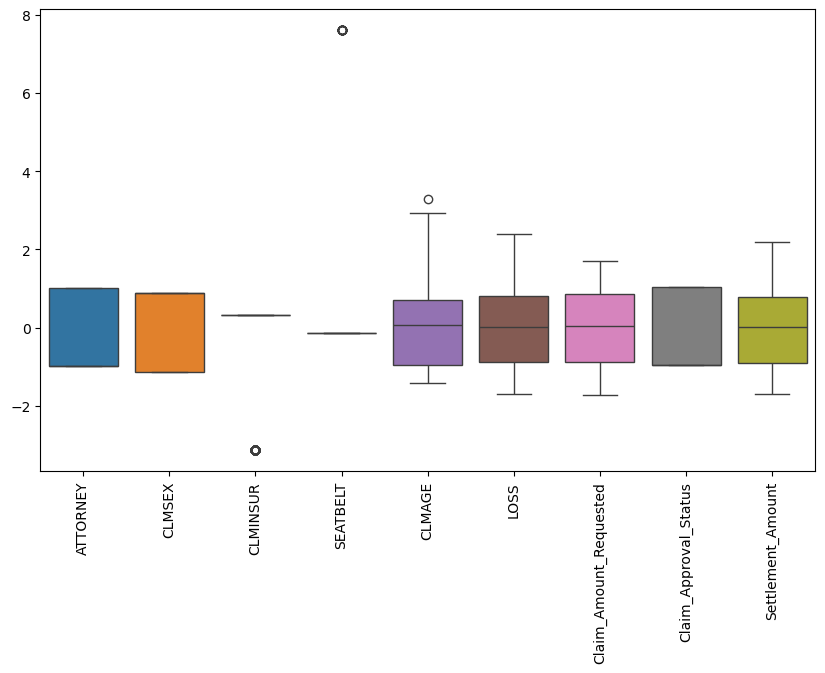

In [100]:
#Check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data_df)
plt.xticks(rotation=90)
plt.show()

In [101]:
# Check if the column 'CLMAGE' exists before imputing
if 'CLMAGE' in data_df.columns:
    # Handle missing values using SimpleImputer if the column exists
    imputer = SimpleImputer(strategy='mean')
    data_df['CLMAGE'] = imputer.fit_transform(data_df[['CLMAGE']])
    data_df['LOSS'] = imputer.fit_transform(data_df[['LOSS']])


In [102]:
# prompt: label encode object colums

# Assuming 'data_df' is your DataFrame and you want to label encode all object columns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through object columns and apply Label Encoding
for col in data_df.select_dtypes(include=['object']).columns:
    data_df[col] = le.fit_transform(data_df[col])


In [103]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create an imputer instance with your desired strategy (e.g., 'mean')
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', etc.

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert y_train to binary using a threshold (e.g., 0.5)
# Assuming 0.5 is a reasonable threshold for your data
y_train_binary = (y_train > 0.5).astype(int)

# Now, you can train your logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_binary) # Use the binary target variable here

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model (example: using accuracy)
from sklearn.metrics import accuracy_score

# Convert y_test to binary using the same threshold as y_train
y_test_binary = (y_test > 0.5).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred)
print(f"Test Accuracy of Logistic Regression: {accuracy}")

Test Accuracy of Logistic Regression: 0.5597014925373134


In [104]:
# Assuming y_train contains continuous values
# Convert y_train to binary using a threshold (e.g., 0.5)
y_train_binary = (y_train > 0.5).astype(int)

# Initialize and train the Decision Tree Classifier with the binary target
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train_binary)  # Use y_train_binary here

dt_pred = dt_model.predict(X_test)

In [105]:
# Initialize and train a Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Convert y_train to binary using a threshold (e.g., 0.5)
y_train_binary = (y_train > 0.5).astype(int)

# Fit the model using the binary target variable
dt_model.fit(X_train, y_train_binary)

dt_y_pred = dt_model.predict(X_test) # Changed dt_pred to dt_y_pred

In [106]:
# Evaluate the Decision Tree Classifier
print("\nDecision Tree Performance:")

# Convert y_test to binary using a threshold (e.g., 0.5)
y_test_binary = (y_test > 0.5).astype(int)

# Use y_test_binary in accuracy_score and classification_report
print(f"Accuracy: {accuracy_score(y_test_binary, dt_y_pred):.2f}")
print(classification_report(y_test_binary, dt_y_pred))


Decision Tree Performance:
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       137
           1       0.51      0.53      0.52       131

    accuracy                           0.53       268
   macro avg       0.53      0.53      0.53       268
weighted avg       0.53      0.53      0.53       268



In [116]:
#other models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Convert y_train and y_test to binary using a threshold (e.g., 0.5)
y_train_binary = (y_train > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Grid Search for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Split quality metric
    'max_depth': [5, 10, 20, None],   # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train_binary) # Use y_train_binary here



# Grid Search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],    # Number of trees
    'criterion': ['gini', 'entropy'],  # Split quality metric
    'max_depth': [5, 10, 20, None],    # Tree depth
    'min_samples_split': [2, 5, 10],   # Minimum samples to split
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train_binary) # Use y_train_binary here

# Best Random Forest model
best_rf = rf_grid_search.best_estimator_
print(f"\nBest Random Forest Parameters: {rf_grid_search.best_params_}")

# Predictions and evaluation for Random Forest
rf_y_pred = best_rf.predict(X_test)
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test_binary, rf_y_pred):.2f}")
print(classification_report(y_test_binary, rf_y_pred))


Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Random Forest Performance:
Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       137
           1       0.49      0.46      0.47       131

    accuracy                           0.50       268
   macro avg       0.50      0.50      0.50       268
weighted avg       0.50      0.50      0.50       268



In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Convert y_train to binary using a threshold (e.g., 0.5)
y_train_binary = (y_train > 0.5).astype(int)

# Now use y_train_binary in GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train_binary) # Changed y_train to y_train_binary
best_model = grid_search.best_estimator_

In [120]:
print(f"Mean Squared Error: {mean_squared_error(y_test, linear_pred)}")
print(f"R-squared: {r2_score(y_test, linear_pred)}")

Mean Squared Error: 0.9836552621479179
R-squared: 0.016344737852082125


In [121]:
# Convert y_test to binary using a threshold (e.g., 0.5)
y_test_binary = (y_test > 0.5).astype(int)

# Convert linear_pred to class labels (0 or 1) based on a threshold
linear_pred_class = (linear_pred > 0.5).astype(int) # Define linear_pred_class

# Now use y_test_binary in the classification_report
print(f"Accuracy (using rounded predictions): {accuracy_score(y_test_binary, linear_pred_class)}")

Accuracy (using rounded predictions): 0.5111940298507462


In [122]:
# Split the dataset
X =  data_df.drop('ATTORNEY', axis=1)
y =  data_df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [125]:
#using GridSearchCV with RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [126]:
# Create a GridSearchCV object
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Convert y_train to binary using a threshold (e.g., 0.5)
y_train_binary = (y_train > 0.5).astype(int)

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy')  # Evaluation metric

# Fit the grid search to your training data using the binary target variable
grid_search.fit(X_train, y_train_binary)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [127]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.5438469897848293


In [128]:
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

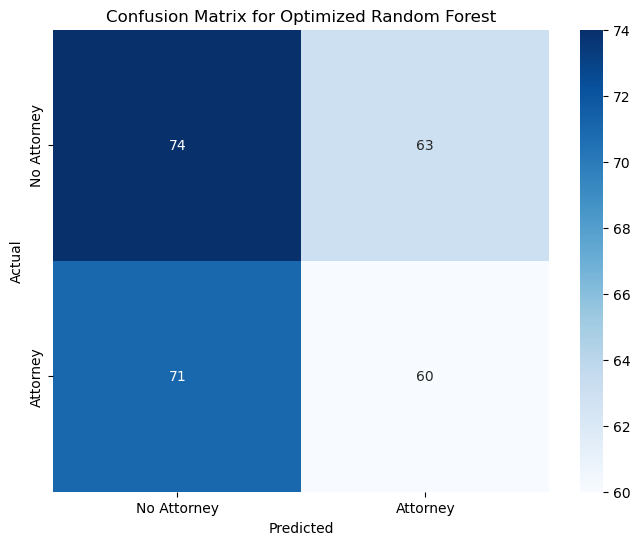

In [129]:
# Confusion Matrix
Y_test_binary = (y_test > 0.5).astype(int)
cm = confusion_matrix(y_test_binary, best_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Attorney', 'Attorney'],
            yticklabels=['No Attorney', 'Attorney'])
plt.title('Confusion Matrix for Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

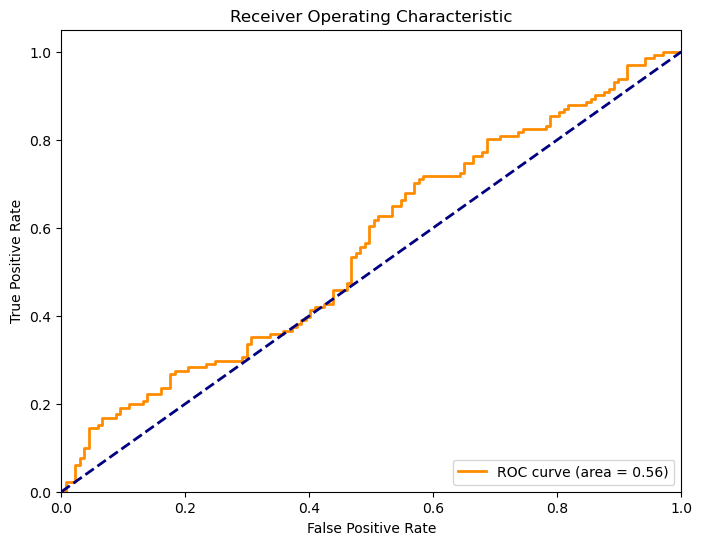

In [130]:
# ROC Curve
if len(np.unique(y_test)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test_binary, best_rf_model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    # Corrected indentation here:
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [131]:
# Further refine the RandomForestClassifier using different parameters
param_grid_2 = {
    'n_estimators': [150, 250, 300],
    'max_depth': [None, 15, 25],
    'min_samples_split': [3, 7, 12],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [133]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load and prepare data
df = pd.read_csv("Updated_Claimants_Dataset.csv")
df.dropna(inplace=True)

# Encode categorical variables
encode_map = {
    'Accident_Severity': {'Minor': 0, 'Moderate': 1, 'Severe': 2},
    'Policy_Type': {'Comprehensive': 0, 'Third-Party': 1},
    'Driving_Record': {'Clean': 0, 'Minor Offenses': 1, 'Major Offenses': 2}
}
df.replace(encode_map, inplace=True)

# Features and target
X = df.drop(columns=["CASENUM", "ATTORNEY"])
y = df["ATTORNEY"]

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Save model
joblib.dump(model, "model_attorney.pkl")


['model_attorney.pkl']

# DEPLOYMENT STREAMLIT

In [134]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load and prepare data
df = pd.read_csv("Updated_Claimants_Dataset.csv")
df.dropna(inplace=True)

# Encode categorical variables
encode_map = {
    'Accident_Severity': {'Minor': 0, 'Moderate': 1, 'Severe': 2},
    'Policy_Type': {'Comprehensive': 0, 'Third-Party': 1},
    'Driving_Record': {'Clean': 0, 'Minor Offenses': 1, 'Major Offenses': 2}
}
df.replace(encode_map, inplace=True)

# Features and target
X = df.drop(columns=["CASENUM", "ATTORNEY"])
y = df["ATTORNEY"]

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Save model
joblib.dump(model, "model_attorney.pkl")

['model_attorney.pkl']